---
title: Fitting simple trends to data using linear regression
---

We shall see how simple trend functions can be fit to time series data using linear regression over the time variable (and over other functions of the time variance such as higher powers and sines and cosines). We start with the US population dataset. 

## US Population Dataset

This dataset is downloaded from FRED and gives monthly population of the United States in thousands. 

In [159]:
import pandas as pd
uspop = pd.read_csv('POPTHM-Jan2025FRED.csv')
print(uspop.head(15))
print(uspop.shape)

   observation_date  POPTHM
0        1959-01-01  175818
1        1959-02-01  176044
2        1959-03-01  176274
3        1959-04-01  176503
4        1959-05-01  176723
5        1959-06-01  176954
6        1959-07-01  177208
7        1959-08-01  177479
8        1959-09-01  177755
9        1959-10-01  178026
10       1959-11-01  178273
11       1959-12-01  178504
12       1960-01-01  178925
13       1960-02-01  179326
14       1960-03-01  179707
(791, 2)


We shall take the covariate variable as $x$ which takes the values $1, \dots, n$. Then we shall fit a linear function of $x$ to the observed time series $y$ using linear regression. 

In [183]:
y = uspop['POPTHM']
import numpy as np
x = np.arange(1, len(y)+1) #this is the covariate 
import statsmodels.api as sm
X = sm.add_constant(x)
linmod = sm.OLS(y, X).fit()
print(linmod.summary())
print(linmod.params)

                            OLS Regression Results                            
Dep. Variable:                 POPTHM   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.422e+05
Date:                Tue, 28 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:52:45   Log-Likelihood:                -7394.9
No. Observations:                 791   AIC:                         1.479e+04
Df Residuals:                     789   BIC:                         1.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.746e+05    198.060    881.427      0.0

The estimated slope parameter $\hat{\beta}_1$ is 213.2353. The interpretation of this is: the population grows by 213235.255 (note that unit of y is thousands) for every month.  The estimated slope parameter is $\hat{\beta}_0$ is $174575.148$.This is an estimate of the population at time 0 which corresponds to December 1958. The standard errors provide estimates of the uncertainty in $\hat{\beta}_0$ and $\hat{\beta}_1$. 

To see how well the regression line fits the data, we can plot the line over the original data, as follows.  

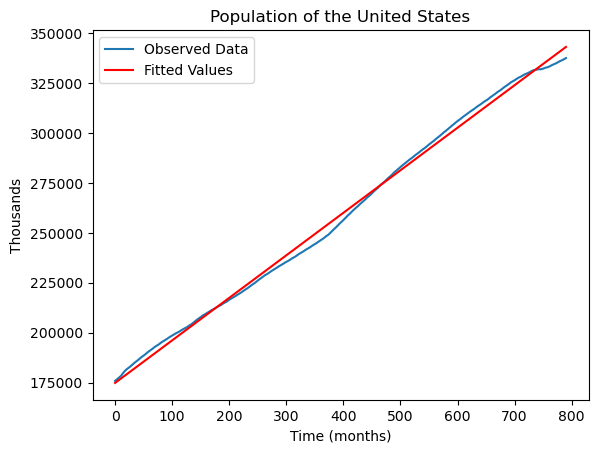

In [161]:
import matplotlib.pyplot as plt
plt.plot(y, label = "Observed Data")
plt.plot(linmod.fittedvalues, label = 'Fitted Values', color = 'red')
plt.xlabel('Time (months)')
plt.ylabel('Thousands')
plt.title('Population of the United States')
plt.legend()
plt.show()

The fit is decent and the line gives a good idea of the overall population growth. However there are some time periods where the population growth diverges from the overall regression line. 

The fitted regression line allows us to predict the US population at future time points. This is illustrated below. First note that the given dataset gives population numbers until November 2024: 

In [162]:
print(uspop.tail(15))

    observation_date  POPTHM
776       2023-09-01  335612
777       2023-10-01  335773
778       2023-11-01  335925
779       2023-12-01  336070
780       2024-01-01  336194
781       2024-02-01  336306
782       2024-03-01  336423
783       2024-04-01  336550
784       2024-05-01  336687
785       2024-06-01  336839
786       2024-07-01  337005
787       2024-08-01  337185
788       2024-09-01  337362
789       2024-10-01  337521
790       2024-11-01  337669


The last (791th) observation corresponds to November 2024. Suppose we want to predict the population for January 2025. This corresponds to $x = 793$. The prediction is given by: $\hat{\beta}_0 + 793 \hat{\beta}_1$. 

In [186]:
predJan2025 = linmod.params.iloc[0] + 793*linmod.params.iloc[1]
print(predJan2025)

343670.70611584


The predicted US population for January 2025 is therefore 343670.7 million (note the units of $y$ are thousands).

linmod supports a function which gives the prediction automatically and also gives uncertainty quantification for the prediction. 

In [190]:
print(linmod.get_prediction([1, 793]).summary_frame())
#use linmod.get_prediction([[1, 793], [1, 795]]).summary_frame() to get multiple predictions at x = 793 and x = 795


            mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  343670.706116  198.435157  343281.182823  344060.229409  338194.76474   

    obs_ci_upper  
0  349146.647492  


The get_prediction function gives two uncertainty intervals. The first is for the **mean** of the prediction, and the second is for the prediction itself. We shall see how these predictions are obtained later. The commonly used uncertainty interval is the second one, which in this case, is $[338194.76474, 349146.647492]$.

## Google Trends Dataset for the query Amazon

https://trends.google.com/trends/ is another (in addition to FRED) great source for time series datasets (see https://en.wikipedia.org/wiki/Google_Trends). The following is the trends monthly dataset for the query "amazon". 

In [208]:
amazon = pd.read_csv('AmazonTrends27Jan2025.csv', skiprows = 1)
#we are skipping the first row as it does not contain any data 
print(amazon.head())
amazon.columns = ['Month', 'AmazonTrends']
print(amazon.tail(10))

     Month  amazon: (United States)
0  2004-01                       10
1  2004-02                        9
2  2004-03                        9
3  2004-04                        9
4  2004-05                        9
       Month  AmazonTrends
243  2024-04            61
244  2024-05            66
245  2024-06            65
246  2024-07            68
247  2024-08            63
248  2024-09            60
249  2024-10            60
250  2024-11            63
251  2024-12            72
252  2025-01            61


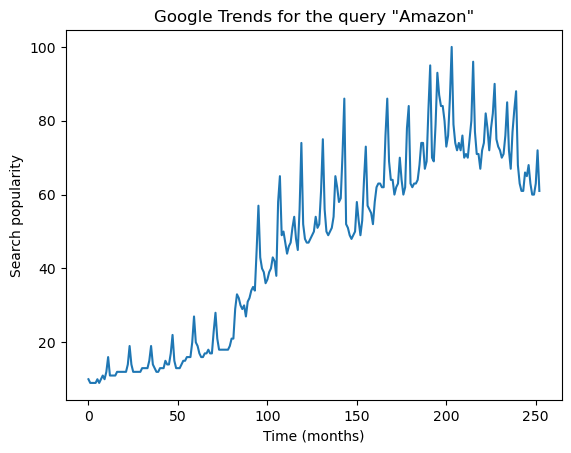

In [209]:
#Here is a plot of the data
plt.plot(amazon['AmazonTrends'])
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google Trends for the query "Amazon"')
plt.show()

In [210]:
#Fitting a line: 
y = amazon['AmazonTrends'] #should we be taking logs instead as in y = np.log(amazon['AmazonTrends'])
x = np.arange(1, len(y) + 1)
X = sm.add_constant(x)
linmod = sm.OLS(y, X).fit()
print(linmod.summary())

                            OLS Regression Results                            
Dep. Variable:           AmazonTrends   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1488.
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.67e-107
Time:                        21:01:31   Log-Likelihood:                -933.40
No. Observations:                 253   AIC:                             1871.
Df Residuals:                     251   BIC:                             1878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4659      1.226      4.458      0.0

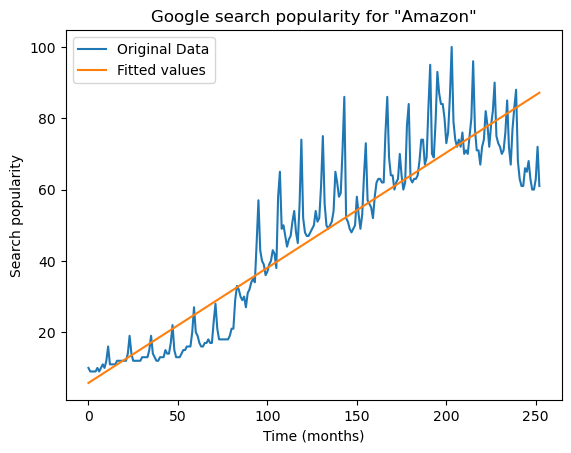

In [211]:
plt.plot(y, label = 'Original Data')
plt.plot(linmod.fittedvalues, label = "Fitted values")
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()

The line does not capture the trend in the data well. We can improve the model by adding a quadratic term. 

In [212]:
#Let us add a quadratic term: 
x2 = x ** 2
X = np.column_stack([x, x2])
X = sm.add_constant(X)
quadmod = sm.OLS(y, X).fit()
print(quadmod.summary())

                            OLS Regression Results                            
Dep. Variable:           AmazonTrends   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     889.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.14e-114
Time:                        21:01:33   Log-Likelihood:                -913.42
No. Observations:                 253   AIC:                             1833.
Df Residuals:                     250   BIC:                             1843.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9098      1.711     -1.700      0.0

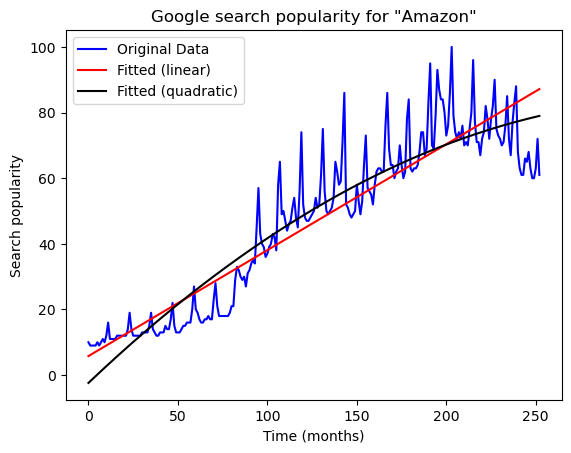

In [213]:
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(linmod.fittedvalues, label = "Fitted (linear)", color = 'red')
plt.plot(quadmod.fittedvalues, label = "Fitted (quadratic)", color = 'black')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()

The fit is still not good. Let us add a cubic term. 

In [214]:
#Cubic term: 
x2 = x ** 2
x3 = x ** 3
X = np.column_stack([x, x2, x3])
X = sm.add_constant(X)
cubmod = sm.OLS(y, X).fit()
print(cubmod.summary())

                            OLS Regression Results                            
Dep. Variable:           AmazonTrends   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     965.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.78e-137
Time:                        21:01:36   Log-Likelihood:                -857.44
No. Observations:                 253   AIC:                             1723.
Df Residuals:                     249   BIC:                             1737.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5863      1.845      6.279      0.0

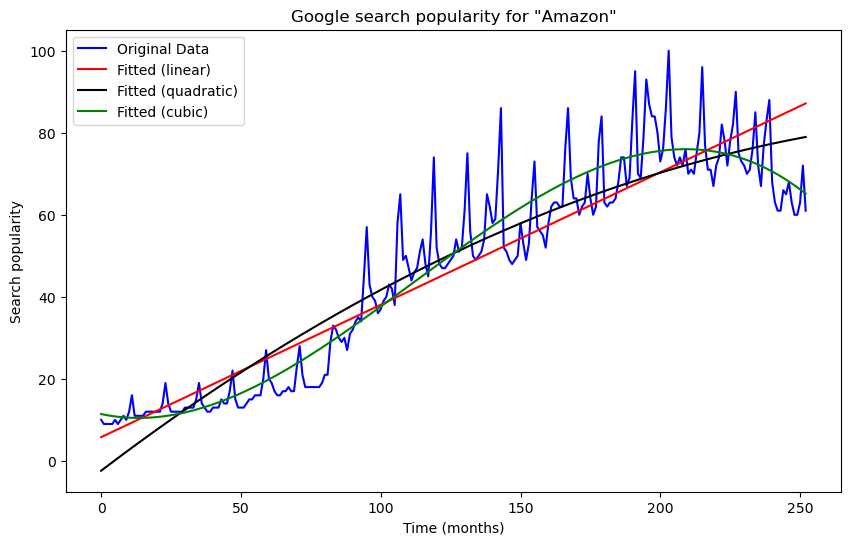

In [215]:
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(linmod.fittedvalues, label = "Fitted (linear)", color = 'red')
plt.plot(quadmod.fittedvalues, label = "Fitted (quadratic)", color = 'black')
plt.plot(cubmod.fittedvalues, label = "Fitted (cubic)", color = 'green')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()

Now the fit is pretty good. This is a monthly dataset which also has a clear seasonal pattern. Some months in each year have a high $y$ value compared to other months. We can capture this seasonal pattern by adding cosines and sines to the regression model. The simplest seasonal functions with period $12$ are $\cos(2 \pi x/12)$ and $\sin(2 \pi x/12)$. Let us add these to the model. 

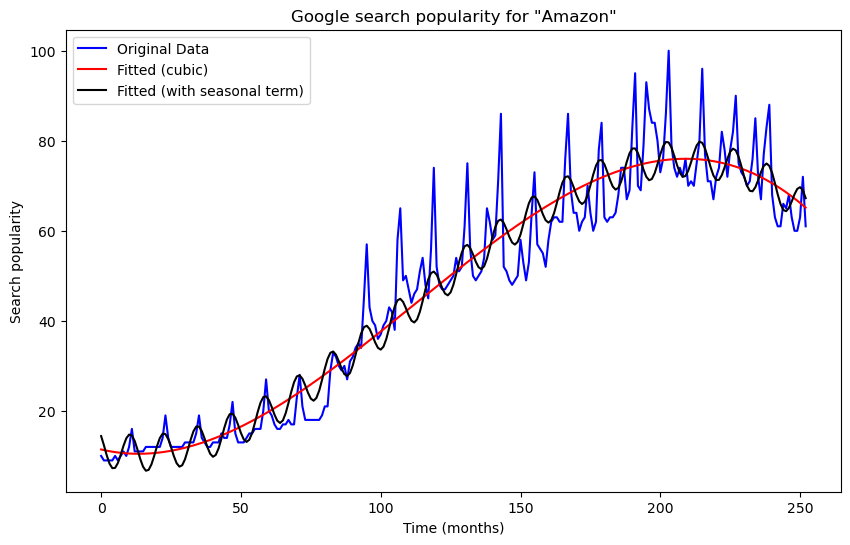

In [217]:
#Adding seasonal terms to the model: 
x4 = np.cos(2 * np.pi * x * (1/12))
x5 = np.sin(2 * np.pi * x * (1/12))
X = np.column_stack([x, x2, x3, x4, x5])
X = sm.add_constant(X)
seasmod1 = sm.OLS(y, X).fit()
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(cubmod.fittedvalues, label = "Fitted (cubic)", color = 'red')
plt.plot(seasmod1.fittedvalues, label = "Fitted (with seasonal term)", color = 'black')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()


The fit is better but the seasonal term is not enough to capture the actual oscillation present in the data. We improve the fit by adding two more seasonal functions $\cos(2 \pi x (2/12))$ and $\sin(2 \pi x (2/12))$. 

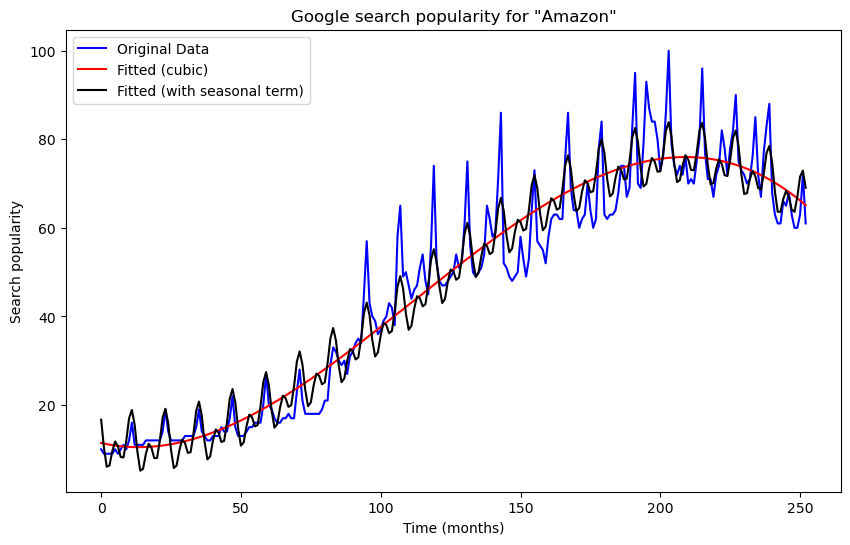

In [218]:
#Adding seasonal terms to the model: 
x4 = np.cos(2 * np.pi * x * (1/12))
x5 = np.sin(2 * np.pi * x * (1/12))
x6 = np.cos(2 * np.pi * x * (2/12))
x7 = np.sin(2 * np.pi * x * (2/12))
X = np.column_stack([x, x2, x3, x4, x5, x6, x7])
X = sm.add_constant(X)
seasmod = sm.OLS(y, X).fit()
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(cubmod.fittedvalues, label = "Fitted (cubic)", color = 'red')
plt.plot(seasmod.fittedvalues, label = "Fitted (with seasonal term)", color = 'black')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()


The fit is much improved (even though there is still some discrepancy between the seasonal oscillations in the data and the fitted function). We can use this model to predict the data for a bunch of future time points. 

In [219]:
#Computing future predictions: 
nf = 100 #number of future points where we are calculating predictions
xf = np.arange(len(x) + 1, len(x) + 1 + nf) #these are the future time points
x2f = xf ** 2
x3f = xf ** 3
x4f = np.cos(2 * np.pi * xf * (1/12))
x5f = np.sin(2 * np.pi * xf * (1/12))
x6f = np.cos(2 * np.pi * xf * (2/12))
x7f = np.sin(2 * np.pi * xf * (2/12))
Xf = np.column_stack([xf, x2f, x3f, x4f, x5f, x6f, x7f])
Xf = sm.add_constant(Xf)
pred = Xf @ np.array(seasmod.params) #these are the predictions
print(pred)

[ 62.33354419  57.5707147   57.4025666   60.14123908  61.78180958
  60.18068867  57.16397471  56.46682572  59.62728959  64.04014559
  65.2262396   61.13794896  54.24182287  49.28634604  48.92424875
  51.4676702   52.91168785  51.11271224  47.89684175  46.9992344
  49.95793806  54.16773202  55.14946216  50.8555058   43.75241217
  38.58866595  38.01699745  40.34954585  41.5813886   39.56893627
  36.13828721  35.02459946  37.76592089  41.75703078  42.51877502
  38.00353092  30.67784771  25.29021008  24.49334832  26.59940163
  27.60344746  25.36189637  21.70084672  20.35545654  22.86377371
  26.62057749  27.14671379  22.39455992  14.83066509   9.20351402
   8.16583698  10.02977318  10.79040005   8.30412817   4.39705589
   2.80434125   5.06403212   8.57090777   8.84581409   3.84112841
  -3.97660005  -9.85888661 -11.15300096  -9.54680391  -9.04521802
 -11.79183273 -15.96054966 -17.8162108  -15.82076826 -12.57944278
 -12.57138845 -17.84422797 -25.93141211 -32.08445618 -33.65062987
 -32.317794

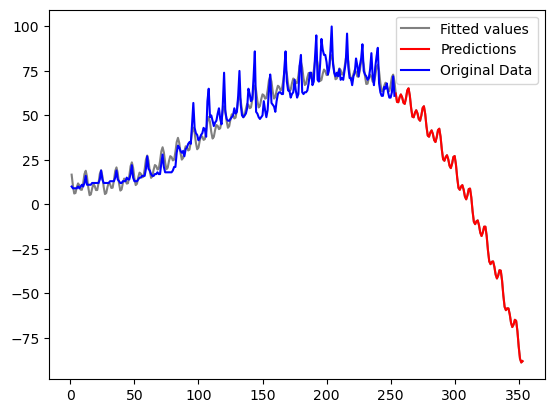

In [ ]:
#Plotting the data, fitted values and predictions
xall = np.concatenate([x, xf])
fittedpred = np.concatenate([seasmod.fittedvalues, pred])
#plt.figure(figsize = (10, 6))
#print(x)
#print(xf)
plt.plot(xall, fittedpred, color = 'gray', label = 'Fitted values')
plt.plot(xf, pred, color = 'red', label = 'Predictions')
plt.plot(x, y, label = 'Original Data', color = 'blue')
plt.legend()
plt.show()

Note that the future predictions become negative after a certain time. This is because the predictions follow the decreasing trend in the cubic function near the right end of the dataset. In this particular problem, negative predictions are meaningless. This issue can be fixed if we fit models to the logarithms of the original data. The model predictions will then have to be exponentiated if we want predictions for the original data. This exponentiation will ensure that all predictions are positive. 

[4.04755544 3.93709815 3.92125227 3.97179077 4.00777692 3.98106626
 3.92404976 3.91200234 3.97909707 4.07440479 4.10451207 4.02236631
 3.87472641 3.76066131 3.74118872 3.7880816  3.82040325 3.79000916
 3.72929035 3.7135217  3.77687631 3.868425   3.89475435 3.80881176
 3.65735612 3.53945639 3.51613026 3.55915071 3.58758101 3.55327668
 3.48862872 3.46891202 3.52829968 3.61586252 3.63818711 3.54822086
 3.39272267 3.27076148 3.24335498 3.28227616 3.30658829 3.26814689
 3.19934296 3.17545139 3.23064527 3.31399543 3.33208844 3.23787171
 3.07810413 2.95185464 2.92014096 2.95473604 2.97470318 2.93189788
 2.85871115 2.83041787 2.88119115 2.9601018  2.9737364  2.87504236
 2.71077857 2.58001397 2.54376626 2.57380843 2.58920374 2.54180772
 2.46401136 2.43108956 2.4772154  2.55145972 2.56040909 2.45701091
 2.28802407 2.15251753 2.11150898 2.1367714  2.14736807 2.09515449
 2.01252168 1.97474452 2.01599611 2.08534727 2.08938457 1.98105542
 1.80711872 1.66664341 1.62064719 1.64090304 1.64647423 1.5892

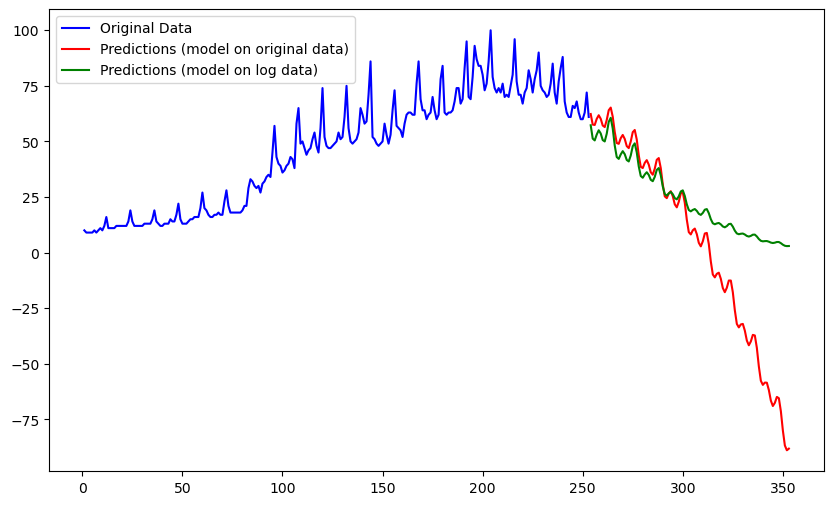

In [220]:
#Prediction on log(data):
ylog = np.log(amazon['AmazonTrends'])
seasmodlog = sm.OLS(ylog, X).fit()
predlog = Xf @ np.array(seasmodlog.params)
print(predlog)

xall = np.concatenate([x, xf])
fittedpred_logmodel = np.concatenate([np.exp(seasmodlog.fittedvalues), np.exp(predlog)])
plt.figure(figsize = (10, 6))
#print(x)
#print(xf)
plt.plot(x, y, label = 'Original Data', color = 'blue')
plt.plot(xf, pred, color = 'red', label = 'Predictions (model on original data)')
#plt.plot(xall, fittedpred_logmodel, color = 'black')
plt.plot(xf, np.exp(predlog), color = 'green',  label = 'Predictions (model on log data)')
plt.legend()
plt.show()